In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Data Extraction

In [2]:
#load
paid = pd.read_csv("./../data/paid_platform.csv")
conversion = pd.read_csv("./../data/conversion_data.csv")

#format
paid.rename(columns={col: col.lower().replace('# ', '').replace(' ', '_').replace('$_', '').replace('utm_', '') for col in paid.columns}, inplace=True)
conversion.rename(columns={col: col.lower().replace('# ', '').replace(' ', '_').replace('$_', '').replace('utm_', '') for col in conversion.columns}, inplace=True)

# EDA - PRE DATA CLEANNING

### 1) Paid

In [3]:
paid.head(3)

,medium,source,traffic_week,impressions,clicks,cost
0,paid-social,linkedin,2023-10-23,4881796,21954,"$169,017.58"
1,paid-social,linkedin,2023-10-16,6335386,15776,"$174,972.20"
2,paid-social,linkedin,2023-10-09,4485024,35009,"$327,466.25"


In [4]:
paid.describe().T

,count,mean,std,min,25%,50%,75%,max
impressions,84.0,1.231917e+07,1.680657e+07,23783.0,1868817.75,4416549.0,13530960.75,68992149.0
clicks,84.0,9.992399e+04,1.024808e+05,2544.0,26509.00,43895.5,135336.50,416503.0


In [5]:
for col in ['medium', 'source']:
  print(f"{col} : {paid[col].unique()}")

medium : ['paid-social' 'paid-search']
source : ['linkedin' 'google' 'facebook' 'bing']


# Conversion

In [6]:
conversion.head(3)

,touched_date,medium,source,campaign,demo_occurred,sales_qualified_opportunity,closed_won_opportunity
0,2023-10-29,paid-search,google,nam-t1_acq_searchnonbranded_google_search_coun...,2.5,0.0,0.0
1,2023-10-29,paid-listicle,peoplemanagingpeople,ww_acq_prosp_pmp_paidlist_cadpayroll-pmp-__all,2.5,2.5,0.0
2,2023-10-29,paid-social,facebook,nam-t1_consider_calculate_fb_image_all-reengag...,2.4,0.0,0.0


In [7]:
conversion.shape

(11011, 7)

In [8]:
conversion.describe().T

,count,mean,std,min,25%,50%,75%,max
demo_occurred,11011.0,1.792998,3.570338,0.0,0.0,0.9,2.4,107.7
sales_qualified_opportunity,11011.0,0.956507,2.687331,0.0,0.0,0.0,1.0,58.5
closed_won_opportunity,11011.0,0.213141,1.117871,0.0,0.0,0.0,0.0,43.3


In [9]:
for col in ['medium','campaign','source']:

  print(f"{col} : {conversion[col].nunique()}")

medium : 184
campaign : 1039
source : 281


In [10]:
conversion['medium'].unique().tolist()

['paid-search',
 'paid-listicle',
 'paid-social',
 'sponsored-newsletter',
 'email-newsletter',
 'email',
 'display',
 'pdf',
 'referral',
 'social',
 'tradeshow-sponsorship',
 'newsletter',
 'event',
 '648993969981',
 'company_profile',
 'cpc',
 'webinar',
 'direct-referral',
 'self-signup',
 'paid-video',
 'deel-hosted-event',
 'paid-company-listing',
 'hosted-deel-event',
 'facebook',
 'partner',
 'paid-lead-buy',
 'organic-social',
 'Event',
 'cpm',
 'in-app',
 'paid social',
 'tradeshow',
 'tradeshow-attendance-only',
 'free-company-profile',
 'Partner - Webinar',
 'mql-email',
 'content',
 'ashby rec ops',
 'prospect newsletter',
 'article',
 'paid',
 'sponsored-post',
 'paid-content-syndication',
 'utm_medium=paid-lead-buy',
 'Webinar',
 'Tradeshow',
 '18637706604',
 'ig',
 'linkedin',
 'email sequence',
 'email+sequence',
 'all',
 'linkedin_post',
 'AE',
 'kristopher',
 'lea',
 'jonathan',
 'paidsocial',
 'sponsor[���]1-au_aware_download_hrm_sponnewsletter_--womanphoto_gmobil_a

In [11]:
conversion['source'].unique().tolist()

['google',
 'peoplemanagingpeople',
 'facebook',
 'hrci',
 'inside.com',
 'hs_automation',
 'linkedin',
 'paved',
 'selectsoftwarereviews',
 'gated_assets',
 'deel.com',
 'bing',
 'hrdive',
 'hs_email',
 'deelsolutions.com',
 'hr-brew',
 'mvf-global',
 'tradeshow-sponsorship',
 'tech.therundown.ai',
 'event',
 'cashnut',
 '127428859612',
 'trustradius',
 'stripeatlas',
 'webinar',
 'hosted-deel-event',
 'self-signup',
 'youtube',
 'deel-hosted-event',
 'capterra',
 'paid-social',
 'hv',
 'remotepad.com',
 'newsletter.backedfounders.com',
 'partner',
 'selecthub',
 'techround',
 'Event',
 'remoteworkingtrends',
 'affiliates',
 'in-app',
 'recruiterslineup',
 'brex',
 'secret',
 'youtube.com',
 'gated_asset',
 'tradeshow',
 'asset_guide',
 'houcks',
 'pitchwall',
 'e-resident.gov.ee',
 'techno-advice',
 'nautacapital',
 'hr-grapevine',
 'sendgrid.com',
 'torre',
 'help.letsdeel.com',
 'sendgrid',
 'www.opensourceceo.com',
 'tradeshow-attendance-only',
 'producthunt',
 'slidebean',
 'Part

In [12]:
conversion['campaign'].unique().tolist()

['nam-t1_acq_searchnonbranded_google_search_countryhire--_gh_all',
 'ww_acq_prosp_pmp_paidlist_cadpayroll-pmp-__all',
 'nam-t1_consider_calculate_fb_image_all-reengage-__all',
 'emea-t1a_acq_searchnonbranded_google_search_payroll--_gp_all',
 'ww_engage_download_hrci_sponnewsletter_hr-hrbundle-oct23_hr_all',
 nan,
 'emea-t1b_acq_searchnonbranded_google_search_payroll--_gp_all',
 'ww_operat_oneoff_hsauto_doubleopt_--__all',
 'apac-t1_acq_searchbrand_google_search_exact--__all',
 'ww_acq_prosp_pmp_paidlist_freehr-pmp-smb_hr_all',
 'latam-t2_consider_download_fb_image_general-reengage-es__all',
 'emea-t1a_acq_searchnonbranded_google_search_hris--_hr_all',
 'ww_fb_download_a/b-test',
 'emea-t1a_consider_download_google_dis_general-reengage-discovery__all',
 'emea-t1a_acq_searchbrand_google_search_broad--__all',
 'nam_engage-consideration_download',
 'emea-t1b_consider_download_li_image_ghic-reengage-lgf__all',
 'nam-t1_acq_rtg_li_conversation_general-rtgall-__upmment',
 'ww_acq_prosp_pmp_pa

## Quality Remarks

Conversion Data, by columns: 
1) utm-medium:
   - it doesnt follow a strict structure
   - it doest not follow the same naming as paid plat. data.
   - Pure Numeric types should not be allowed, as they give no information.
   - it has unvalid itmes such as 'pdf','sponsor[���]..'
   Overall needs: Quality and unit tests from Data Eng team.
2) utm-source:
   - The structure seems to be a bit better, still needs filtering. (example: 'utm_source=peoplemanagingpeople)
   - Pure Numeric types should not be allowed, as they give no information.

3) utm-campaign:
   - seems to have a standard structure (Source-Campaign-Medium-Term-Content: example emea-t1a_acq_searchbrand_google_search_all-fr-__all)
   - Not consistent. ('ghg_rwanda')
   - Needs more check filters

Paid Platform Data, by columns:
1) Besides the column naming and the dollards sign, the data is of good quality.

### Missing Values

In [21]:
paid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   medium        84 non-null     object
 1   source        84 non-null     object
 2   traffic_week  84 non-null     object
 3   impressions   84 non-null     int64 
 4   clicks        84 non-null     int64 
 5   cost          84 non-null     object
dtypes: int64(2), object(4)
memory usage: 4.1+ KB


In [20]:
conversion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11011 entries, 0 to 11010
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   touched_date                 11011 non-null  object 
 1   medium                       11011 non-null  object 
 2   source                       11011 non-null  object 
 3   campaign                     9884 non-null   object 
 4   demo_occurred                11011 non-null  float64
 5   sales_qualified_opportunity  11011 non-null  float64
 6   closed_won_opportunity       11011 non-null  float64
dtypes: float64(3), object(4)
memory usage: 602.3+ KB


> Conversion Campaign has 1127 missing values

### Outliers

#### Conversion Data

In [14]:
conversion.columns

Index(['touched_date', 'medium', 'source', 'campaign', 'demo_occurred',
       'sales_qualified_opportunity', 'closed_won_opportunity'],
      dtype='object')

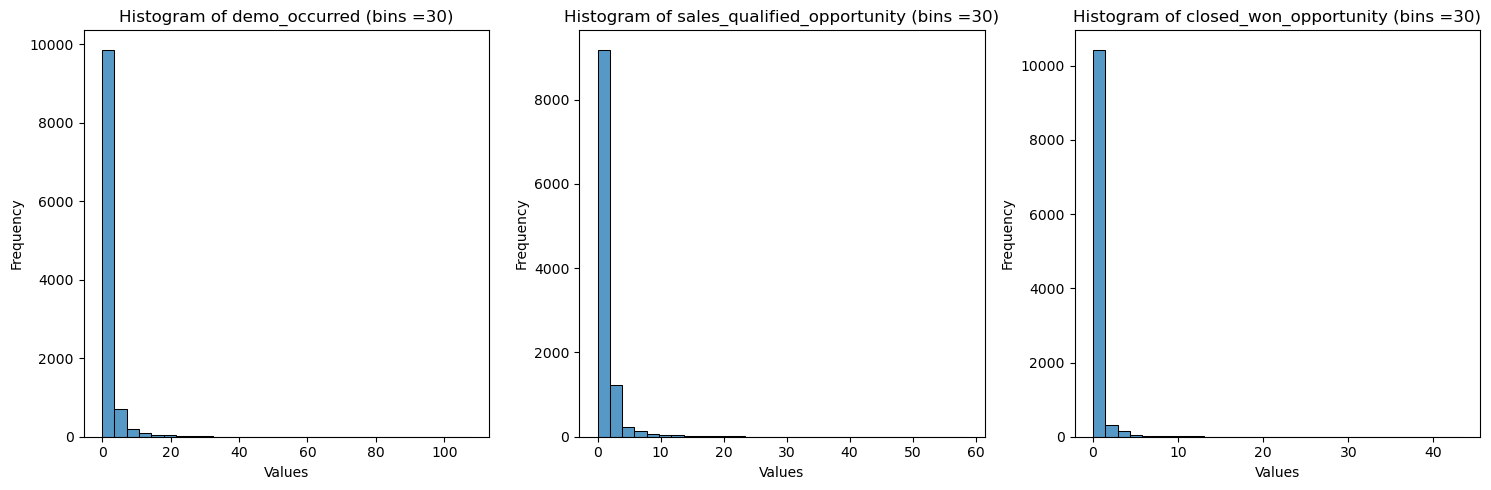

In [17]:
columns_to_plot = ['demo_occurred',
       'sales_qualified_opportunity', 'closed_won_opportunity']
bins = 30
 
# Set the figure size
plt.figure(figsize=(15, 5))

# Iterate over each column and create a separate histogram
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(1, len(columns_to_plot), i)
    sns.histplot(data=conversion, x=column, bins=bins)  # Set kde=True to add a kernel density estimate line
    plt.title('Histogram of {} (bins ={})'.format(column,bins))
    plt.xlabel('Values')
    plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


> many values are 0

#### Filtering 0 values

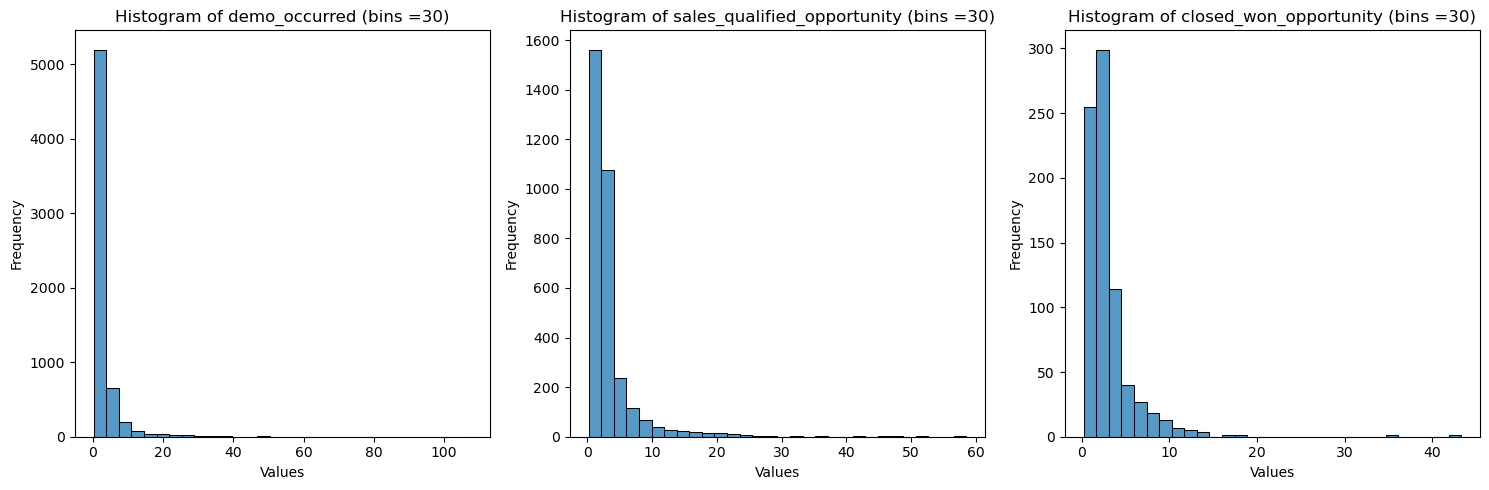

In [24]:
columns_to_plot = ['demo_occurred',
       'sales_qualified_opportunity', 'closed_won_opportunity']
bins = 30
 
# Set the figure size
plt.figure(figsize=(15, 5))

# Iterate over each column and create a separate histogram
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(1, len(columns_to_plot), i)
    sns.histplot(data=conversion_filtered, x=column, bins=bins)  # Set kde=True to add a kernel density estimate line
    plt.title('Histogram of {} (bins ={})'.format(column,bins))
    plt.xlabel('Values')
    plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


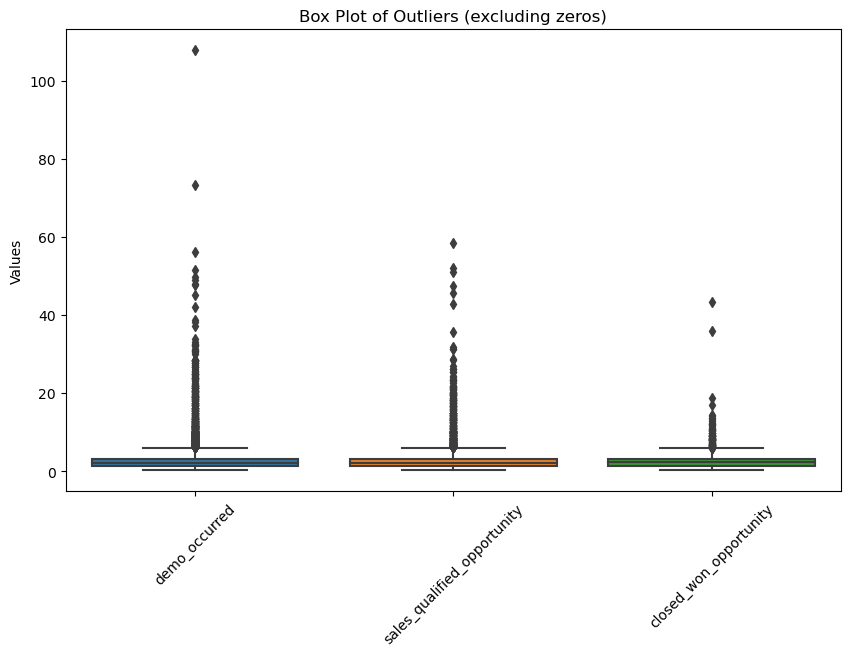

In [64]:
 
conversion_filtered = conversion[columns_to_plot][conversion[columns_to_plot] != 0]

# Set the figure size
plt.figure(figsize=(10, 6))

# Create the box plot with filtered data
sns.boxplot(data=conversion_filtered)

# Add title and labels
plt.title('Box Plot of Outliers (excluding zeros)')
plt.ylabel('Values')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Show the plot
plt.show()


In [65]:
outliers_counts = {}
for column in columns_to_plot: 
    Q1 = conversion[column].quantile(0.25)
    Q3 = conversion[column].quantile(0.75)
     
    IQR = Q3 - Q1
     
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
     
    outliers_count = ((conversion[column] < lower_bound) | (conversion[column] > upper_bound)).sum()
     
    outliers_counts[column] = outliers_count
 
pd.DataFrame(outliers_counts.items(), columns=['Column', 'Outliers'])

,Column,Outliers
0,demo_occurred,600
1,sales_qualified_opportunity,1357
2,closed_won_opportunity,786


A lot of outliers, lets check

In [58]:
bins = [0,1,2,3, 5, 10, 15, 30, float('inf')]

# Initialize an empty list to store DataFrames
count_dfs = []

# Iterate over each column and calculate the grouped counts
for column in columns_to_plot:
    # Apply pd.cut() to create bins and count values in each bin
    counts = pd.cut(conversion[column], bins=bins).value_counts().sort_index().reset_index()
    
    # Rename the columns to match the final DataFrame structure
    counts.columns = ['Range', 'Count']
    
    # Add the column name to the DataFrame
    counts['Column'] = column
    
    # Append the results to the list
    count_dfs.append(counts)

# Concatenate the list of DataFrames into a single DataFrame
grouped_counts = pd.concat(count_dfs, ignore_index=True)

# Display the resulting DataFrame
pivot_df = grouped_counts.pivot_table(index='Column', columns='Range', values='Count', fill_value=0)
pivot_df


Range,"(0.0, 1.0]","(1.0, 2.0]","(2.0, 3.0]","(3.0, 5.0]","(5.0, 10.0]","(10.0, 15.0]","(15.0, 30.0]","(30.0, inf]"
Column,,,,,,,,
closed_won_opportunity,116,230,208,128,83,17,2,2
demo_occurred,1035,1864,1608,992,518,119,112,25
sales_qualified_opportunity,536,944,783,516,278,87,70,10


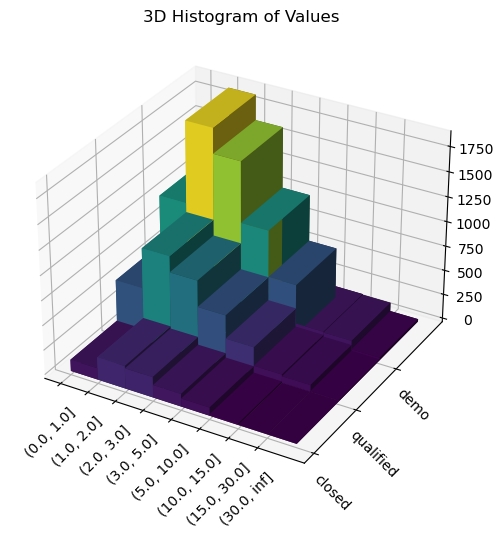

In [67]:
# Define the new order for the index
new_order = ['closed_won_opportunity', 'sales_qualified_opportunity','demo_occurred' ]

# Reindex the DataFrame according to the new order
pivot_df = pivot_df.reindex(new_order)


# Assuming pivot_df is defined and contains the required data
ranges = pivot_df.columns
columns = pivot_df.index

# Create meshgrid for the ranges and columns
X, Y = np.meshgrid(np.arange(len(ranges)), np.arange(len(columns)))

# Flatten pivot_df values to use as heights in the histogram
Z = pivot_df.values.flatten()

# Create figure and axis
fig = plt.figure(figsize=(100, 6))
ax = fig.add_subplot(111, projection='3d')

# Generate colors based on Z values using a colormap
colors = plt.cm.viridis(Z / max(Z))

# Plot 3D histogram with colors
ax.bar3d(X.ravel(), Y.ravel(), np.zeros_like(Z), 1, 1, Z, color=colors,   shade=True)

ax.set_title('3D Histogram of Values')

# Set ticks and labels for x-axis and y-axis
ax.set_xticks(np.arange(len(ranges)))
ax.set_xticklabels(ranges)
ax.set_yticks(np.arange(len(columns)))
ax.set_yticklabels(['closed', 'qualified',
       'demo'])

 

# Rotate y-axis labels for better readability
plt.yticks(rotation=-45)
plt.xticks(rotation=45)

# Show plot
plt.show()


In [66]:
 
conversion_filtered_filtered = conversion_filtered[columns_to_plot][conversion_filtered[columns_to_plot] != 0]

outliers_counts = {}
for column in columns_to_plot: 
    Q1 = conversion_filtered[column].quantile(0.25)
    Q3 = conversion_filtered[column].quantile(0.75)
     
    IQR = Q3 - Q1
     
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
     
    outliers_count = ((conversion_filtered[column] < lower_bound) | (conversion_filtered[column] > upper_bound)).sum()
     
    outliers_counts[column] = outliers_count
 
pd.DataFrame(outliers_counts.items(), columns=['Column', 'Outliers'])

,Column,Outliers
0,demo_occurred,600
1,sales_qualified_opportunity,352
2,closed_won_opportunity,78


# EDA - AFTER DATA CLEANNING

In [ ]:
df = pd.read_csv('./../data/cleaned_joint_df.csv')

In [ ]:
df.head(2)

,medium_paid,source,traffic_week,impressions,clicks,cost,touched_date,medium_conversion,campaign,demo_occurred,sales_qualified_opportunity,closed_won_opportunity
0,paid-social,linkedin,2023-10-23,4881796,21954,"$169,017.58",2023-10-23,organic-social,emea-t1a-nl_consider_prosp_li_postevent_all-sn...,0.0,0.0,0.0
1,paid-social,linkedin,2023-10-23,4881796,21954,"$169,017.58",2023-10-23,paid-social,nam-t1_acq_rtg_li_conversation_general-rtgall-...,1.6,0.0,0.0


In [ ]:
cols = ['traffic_week','touched_date', 'medium_paid','medium_conversion', 'source','campaign',  'impressions', 'clicks',
       'cost',   
       'demo_occurred', 'sales_qualified_opportunity',
       'closed_won_opportunity']
df[cols]

,traffic_week,touched_date,medium_paid,medium_conversion,source,campaign,impressions,clicks,cost,demo_occurred,sales_qualified_opportunity,closed_won_opportunity
0,2023-10-23,2023-10-23,paid-social,organic-social,linkedin,emea-t1a-nl_consider_prosp_li_postevent_all-sn...,4881796,21954,"$169,017.58",0.0,0.0,0.0
1,2023-10-23,2023-10-23,paid-social,paid-social,linkedin,nam-t1_acq_rtg_li_conversation_general-rtgall-...,4881796,21954,"$169,017.58",1.6,0.0,0.0
2,2023-10-23,2023-10-23,paid-social,paid-social,linkedin,nam-t1_acq_prosp_li_image_core-ttl-lgf__smbmm,4881796,21954,"$169,017.58",0.0,0.0,0.0
3,2023-10-23,2023-10-23,paid-social,paid-social,linkedin,emea-t2_consider_download_li_image_ghic-reenga...,4881796,21954,"$169,017.58",0.0,0.0,0.0
4,2023-10-23,2023-10-23,paid-social,paid-social,linkedin,emea-t1b_consider_download_li_image_general-re...,4881796,21954,"$169,017.58",0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1355,2023-06-19,2023-06-19,paid-search,paid-search,bing,emea-t1a_acq_searchbrand_bing_search_broad--__all,57243,3996,"$23,881.69",0.3,0.2,0.0
1356,2023-06-19,2023-06-19,paid-search,cpc,bing,NaN,57243,3996,"$23,881.69",0.0,0.0,0.0
1357,2023-06-12,2023-06-12,paid-search,paid-search,bing,nam-t1_acq_searchnonbranded_bing_search_countr...,23783,3195,"$18,257.71",0.9,0.0,0.0
1358,2023-06-12,2023-06-12,paid-search,cpc,bing,NaN,23783,3195,"$18,257.71",0.0,3.3,0.0


In [ ]:
df[cols].

In [ ]:
df.groupby['source']

In [ ]:
df[df.traffic_week ]